In [1]:
import pickle
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pathlib import Path
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import JohnsonCousinsU, JohnsonCousinsB, JohnsonCousinsV, JohnsonCousinsR, JohnsonCousinsI
import matplotlib
%matplotlib inline

# Load the pickle files
with open("/Users/mjablons/Documents/stellar-mesh-integration/tutorial/paper_results/tz_fornacis/data/tz_fornacis_data_eclipses_40000.pkl", "rb") as f:
    data_ec = pickle.load(f)

Connection to online passbands at https://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  If the problem persists and you're using a Mac, you may need to update openssl (see https://phoebe-project.org/help/faq). Original error from urlopen: URLError <urlopen error [Errno 101] Network is unreachable>
float_dtype: <class 'jax.numpy.float32'>


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mjablons/Documents/stellar-mesh-integration/tutorial/paper_results/tz_fornacis/data/tz_fornacis_data_eclipses_40000.pkl'

In [ ]:
import astropy.units as u
(75.6*u.d).to(u.year).value

0.20698151950718685

In [ ]:
johnson_cousins_u = JohnsonCousinsU()
johnson_cousins_b = JohnsonCousinsB()
johnson_cousins_v = JohnsonCousinsV()
johnson_cousins_r = JohnsonCousinsR()
johnson_cousins_i = JohnsonCousinsI()

In [ ]:
times_ec = data_ec['times']
spectra1_ec = data_ec['spectra_body1']
spectra2_ec = data_ec['spectra_body2']
wavelengths_ec = data_ec['wavelengths']

In [ ]:
offset = 10
mag_u_ec = [AB_passband_luminosity(johnson_cousins_u, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
         for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
mag_b_ec = [AB_passband_luminosity(johnson_cousins_b, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
mag_v_ec = [AB_passband_luminosity(johnson_cousins_v, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
mag_r_ec = [AB_passband_luminosity(johnson_cousins_r, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
mag_i_ec = [AB_passband_luminosity(johnson_cousins_i, data_ec['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1_ec, spectra2_ec)][offset:]
times_ec = data_ec['times'][offset:]

In [ ]:
# Define the period for the calculation (in days), e.g. orbital period
period = 0.20698151950718685  # replace with the correct period for TZ Fornacis

# Define a reference epoch (e.g. time of primary eclipse); use the first time as a default
t0 = times_ec[0]

# Calculate phase for each time
phases = ((times_ec - t0) / period) % 1

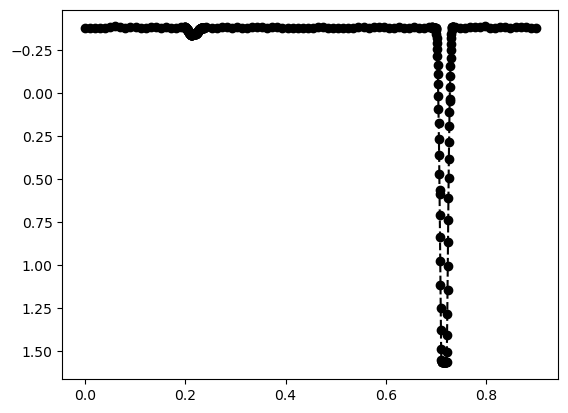

In [ ]:
plt.scatter(phases, mag_u_ec, color='black')
plt.plot(phases, mag_u_ec, linestyle='--', color='black')
plt.gca().invert_yaxis()

Text(0.5, 0, 'Phase')

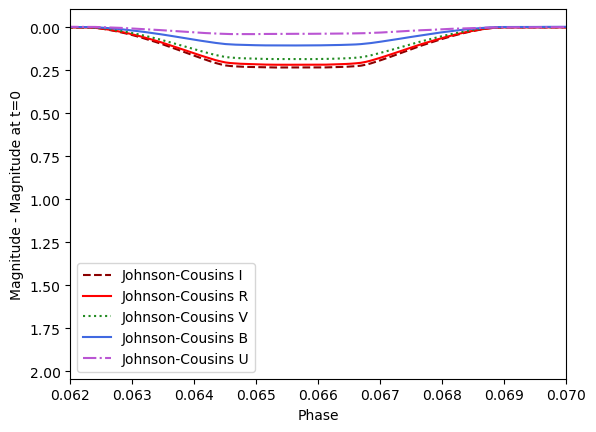

In [ ]:
plt.plot(times_ec, np.array(mag_i_ec)-mag_i_ec[0], label='Johnson-Cousins I', color='darkred', linestyle='--')
plt.plot(times_ec, np.array(mag_r_ec)-mag_r_ec[0], label='Johnson-Cousins R', color='red')
plt.plot(times_ec, np.array(mag_v_ec)-mag_v_ec[0], label='Johnson-Cousins V', color='forestgreen', linestyle=':')
plt.plot(times_ec, np.array(mag_b_ec)-mag_b_ec[0], label='Johnson-Cousins B', color='royalblue')
plt.plot(times_ec, np.array(mag_u_ec)-mag_u_ec[0], label='Johnson-Cousins U', color='mediumorchid', linestyle='-.')
plt.gca().invert_yaxis()
plt.gca().set_xlim(0.062, 0.07)
plt.legend()
plt.ylabel('Magnitude - Magnitude at t=0')
plt.xlabel('Phase')

In [ ]:
times = jnp.sort(jnp.concatenate([jnp.linspace(0, 0.20698151950718685, 100), jnp.linspace(0.062, 0.07, 100), jnp.linspace(0.164, 0.1730, 100)]))